<h1> ceOR51DuK_Assignment_1_Networks_Science</h1>

<img src='entete.png'>

In [1]:
import networkx as nx #we import networkx to manipulate our networks
import matplotlib.pyplot as plt  #we import matplotlib.pyplot to show some plot
import numpy as np  # We import numpy for list and matrix manipulation

In [2]:
#We ignore some warning message
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

<h1> Question 1 </h1>

In [3]:
#we create our graph and we call it G
G=nx.Graph() 
#we create a list containig the labels of all the nodes of our graph
nodes=[1,2,3,4,5,6]   
#we create a list containing all the link between the nodes
links=[(1,2),(1,3),(2,3),(2,6),(2,4),(4,6),(3,6),(3,5)]  
#we define the position of nodes for ploting
posit={1:(-0.6,1.5), 2:(-1.2,0.5), 3:(0.6,1), 4:(-1,-1), 5:(2,0), 6:(0,0)} 

In [4]:
G.add_nodes_from(nodes) #we add all our node to the graph
G.add_edges_from(links)  #we add all our link to the graph

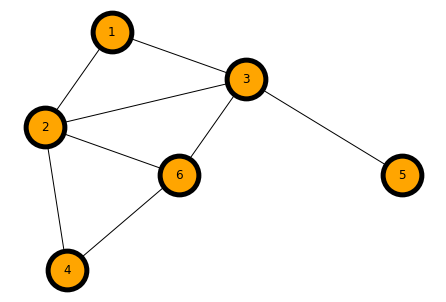

In [5]:
#We can now plot our graph
nx.draw(G, with_labels=True, pos=posit, node_size=1500,\
        linewidths=5,edgecolors='black', node_color='orange')

In [6]:
#We check the number on nodes and links
G.number_of_nodes(),G.number_of_edges()

(6, 8)

<p> This graph has 6 nodes and 8 edges </p>

<h2> (a)The Corresponding adjency matrix A </h2>

In [7]:
# We compute the adjency matrix
A=nx.adjacency_matrix(G).todense()
print(A)

[[0 1 1 0 0 0]
 [1 0 1 1 0 1]
 [1 1 0 0 1 1]
 [0 1 0 0 0 1]
 [0 0 1 0 0 0]
 [0 1 1 1 0 0]]


<p>We can see that the adjency matrix of our graph is symetrics. This means that the graph is an undirected graph </p>

<h2> (b) The corresponding links lists </h2>

In [8]:
#We print the lists of all the links of our graph
print(G.edges())

[(1, 2), (1, 3), (2, 3), (2, 6), (2, 4), (3, 6), (3, 5), (4, 6)]


<h2> (c)The average  clustering coefficient of the network </h2>

In [9]:
c_mean= nx.average_clustering(G)
c_mean

0.5833333333333333

<p>The average of the clustering coefficient of the nethwork is C=58.33%, this mean that there is 58.33% of chance that two neigbour of a given node are also connected. </p>

## (d) If you switch the labels of nodes 5 and 6 in A, how does that move change the adjacency matrix? And the link list?

In [10]:
#we create one another graph with the same edges than the first one
G2=nx.Graph()  
nodes2=[1,2,3,4,5,6]
#we switch the node 5 and 6 when creating the link
links2=[(1,2),(1,3),(2,3),(2,5),(2,4),(4,5),(3,5),(3,6)] 
#we add the node and link to the graph
G2.add_nodes_from(nodes2) 
G2.add_edges_from(links2)
#we compute the adjency matrix
A2=nx.adjacency_matrix(G2).todense() 
print(A2)

[[0 1 1 0 0 0]
 [1 0 1 1 1 0]
 [1 1 0 0 1 1]
 [0 1 0 0 1 0]
 [0 1 1 1 0 0]
 [0 0 1 0 0 0]]


<p> We can see that when we switch the label of node 5 and node 6 in G, there is a permutation of the lines 5 and 6 and also the column 5 and 6 in the adjency matrix </p>

In [11]:
G2.edges()

EdgeView([(1, 2), (1, 3), (2, 3), (2, 5), (2, 4), (3, 5), (3, 6), (4, 5)])

<p> we can see that the number of links is stil yhje same but all the edges which were connected to 6 are now connected to 5 and all those which were connected to 5 are now connected to 6.</p>

## (e) What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

<p> From the adjency matrix we can infer if the graph is directed or not buy looking if the matrix is symetric but using the link list we can not infer that.</p> 

##  (f) How many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3?

In [12]:
A_3=A**3 
A_3

matrix([[2, 6, 6, 3, 1, 3],
        [6, 6, 8, 6, 2, 7],
        [6, 8, 4, 3, 4, 8],
        [3, 6, 3, 2, 2, 5],
        [1, 2, 4, 2, 0, 1],
        [3, 7, 8, 5, 1, 4]], dtype=int32)

<p> we compute the matrix $A^3$ which containt at each index $(i,j)$ the total nober of path of 3 going from a node $n_i$ to a node $n_j$ </p>

<p> The number of paths of length 3 starting from node 1 and ending at node 3 is given by $A^3(1,3)$</p>

In [13]:
A_3[1,3]

6

<p> So we have 6 paths of length 3 starting from node 1 and ending at node 3</p>

## (g) Count the number of cycles of length 4 in network.

<p> The number of cycle of lengh 4 in the network is given by the formula $\frac{1}{8}[Tr(A^4)-Tr(A^2)-2\sum_{j\neq i}^{} a_{ij}^{(2)}]$ </p>

In [14]:
print(A**4)

[[12 14 12  9  6 15]
 [14 27 21 13  8 20]
 [12 21 26 16  4 15]
 [ 9 13 16 11  3 11]
 [ 6  8  4  3  4  8]
 [15 20 15 11  8 20]]


In [15]:
A2=A**2 #we compute the A^2 matrix
A4=A**4 #we compute the A^4 matrix
som=0  #We initialize the sum of link at 0
for i in range(A2.shape[0]):
    for j in range(A2.shape[0]):
        if i!=j :
            som=som+A2[i,j] #we compute the total number of link betwen all the node

nb_cylce=(np.trace(A4)-np.trace(A2)-2*som)/8 #We apply the formula give above
nb_cylce  #we print the number of cycle

2.0

<p> So the total number of cycles of length 4 in our network is 2 </p>

# Question 2

In [16]:
#we import the librairie that will help us to manipulate bipartite networks
from networkx.algorithms import bipartite 

## (a) Construct the above graph using NetworkX. You may have a look bipartite 

In [17]:
B=nx.Graph() #we create a graph
fans=['A','B','C','D','E'] #we create a list containing all our green node
teams=[1,2,3,4] #we create a list containing all our red node
 #we create a list containing all the link between red and green
liens=[('A',1),('B',1),('C',1),('C',3),('D',2),('E',3),('E',4)] 
#We define the position of node for ploting
posi_b= {'A':(-1,4), 'B':(-1,3), 'C':(-1,2), 'D':(-1,1),'E':(-1,0), 1:(1,3.5), 2:(1,2.5), 3:(1,1.5), 4:(1,0.5)}
B.add_nodes_from(fans, bipartite=0) #we add the first group of node to our graph
B.add_nodes_from(teams, bipartite=1)#we add the second group of node to our graph
B.add_edges_from(liens) #we add the links of the node to our graph

In [18]:
#we look is our graph is bipartite
bipartite.is_bipartite(B)

True

<p> The result is "True" this means that we have a bipartite networkx</p>

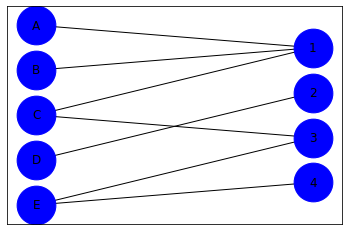

In [19]:
#we plot the constructed network
nx.draw_networkx(B, pos=posi_b, with_labels=True, node_size=1500, node_color='blue')

## (b) Construct its adjacency matrix. Why is it a block-diagonal matrix?

In [20]:
#We construct the adjency matrix of our bipartite network
A_B=nx.adjacency_matrix(B).todense()
print(A_B)

[[0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1]
 [1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]


<p> It is a block diagonal matrix because the network is form of two groups and the elements of each group are not link one to other, so they will form two block containing just zero in the adjency matrix. And due to the fact that there is no node which is related to itselfs</p>

## (c) Construct the adjacency matrix of its two projections, on the green and on the red nodes, respectively.

## Green

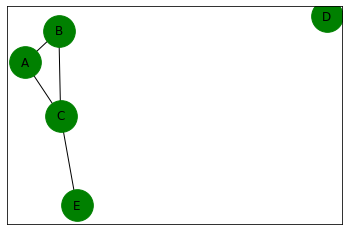

In [21]:
#We extract the projection of the green nodes
green=bipartite.projected_graph(B, fans) 
#we plot to visualise it
nx.draw_networkx(green, with_labels=True, node_color='green', node_size=1000)

In [22]:
A_green=nx.adjacency_matrix(green).todense() #we construct the adjency matrix
print(A_green)

[[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [0 0 0 0 0]
 [0 0 1 0 0]]


## Red

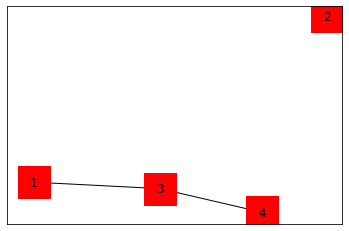

In [23]:
red=bipartite.projected_graph(B, teams) #We extract the projection of the green nodes
nx.draw_networkx(red, with_labels=True, node_shape='s', \
                 node_color='red', node_size=1000) #we plot to visualise it

In [24]:
A_red=nx.adjacency_matrix(red).todense() #we construct the adjency matrix
print(A_red)

[[0 0 1 0]
 [0 0 0 0]
 [1 0 0 1]
 [0 0 1 0]]


## (d) Calculate the average degree of the green nodes and the average degree of the red nodes in the bipartite network.

In [25]:
k_green=0 #we initialise the the total number of degree of the green node at zero
for i in fans: #we take each of the green node
    k_green=k_green+B.degree('{}'.format(i)) #We compute his degree and we add it to the total degree

#we devide the total number of degree by the total number of node to have the average degree
Average_degree_green=k_green/len(fans) 
Average_degree_green

1.4

<p> This show that in average a node of the green side is connected to 1 (1.4) node of the red side </p>

In [26]:
k_red=0 #we initialise the the total number of degree of the red node at zero
for i in teams: #we take each of the red node
    k_red=k_red+B.degree(i)#We compute his degree and we add it to the total degree

#we devide the total number of degree by the total number of node to have the average degree
Average_degree_red=k_red/len(teams)
Average_degree_red

1.75

<p> This show that in average a node of the red side is connected to 2 (1.75) node of the green side </p>

## (e) Calculate the average degree in each of the two network projections. 

## Green_projection

In [27]:
k_green=0 #we initialise the the total number of degree of the green_prjection node at zero
for i in green.nodes:#we take each of the green projection node
    k_green=k_green+(green.degree('{}'.format(i)))#We compute his degree and we add it to the total degree

#we devide the total number of degree by the total number of node to have the average degree
Average_degree=k_green/green.number_of_nodes()
Average_degree

1.6

<p> This mean that for each node of the green side there exist in average 1 (1.6) other node of the green side with who they are connect to the same node in the red group </p> 

## Red_projection

In [28]:
k_red=0#we initialise the the total number of degree of the red projection node at zero
for j in red.nodes:#we take each of the red projection node
    k_red=k_red+(red.degree(j))#We compute his degree and we add it to the total degree

#we devide the total number of degree by the total number of node to have the average degree
Average_degree_red=k_red/red.number_of_nodes()
Average_degree_red

1.0

<p> This mean that for each node of the red side there exist in average 1 other node of the red side with who they are connect to the same node in the green group</p> 

## Is it surprising that the values are different from those obtained in point (c)?

<p> Is it not surprising that the value is different of the one calculate in the previous question because the average degree of the projection show how many node can be regrouped in respect to their relation with a common element in the other group. </p>